# Importing all Libraries :

In [121]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import math
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import *
from sklearn.metrics import roc_curve ,auc
import matplotlib.pyplot as plt




# Uploading the Dataset :

In [120]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))


Saving diabetes.csv to diabetes (1).csv


# Dataset Preparation :

In [122]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [124]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [125]:
X=df.iloc[:,0:7]
Y=df.iloc[:,8]

In [126]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288


In [127]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Implementing the Calulate function to evaluate all parameters :

In [86]:
def calculate(confusion_matrix):
    l1={}
    True_positive=confusion_matrix[0,0]
    False_Positive=confusion_matrix[0,1]
    False_Negative=confusion_matrix[1,0]
    True_Negative=confusion_matrix[1,1]
    TP=True_positive
    FP=False_Positive
    FN=False_Negative
    TN=True_Negative
    True_positive_rate= TP/(TP + FN)
    True_negative_rate= TN/(TN + FP)
    False_positive_rate= FP/(TN + FP)
    False_negative_rate= FN/(TP + FN)
    Recall= TP/(TP + FN)
    Precision= TP/(TP + FP)
    F1_measure= (2 * TP)/(2 * TP + FP + FN)
    Accuracy=(TP + TN)/(TP + FP + FN + TN)
    Error_rate= (FP + FN)/(TP + FP + FN + TN)
    Balanced_Accuracy= 1/2 *((TP/(TP+FN) + (TN/(TN+FP))))
    True_Skill_Statistics = ((TP/(TP+FN))-(FP/(FP+TN)))
    Heidke_Skill_Score=2*((TP * TN) - (FP * FN))/((TP + FN)*(FN+TN)+(TP+FP)*(FP+TN))
    l1 = {'False negative':FN, 'False positive': FP, 'True positive': TP, 'True negative': TN,
              'True positive rate': True_positive_rate, 'True negative rate': True_negative_rate, 'False positive rate': False_positive_rate, 'False negative rate': False_negative_rate, 
              'Recall': Recall, 'Precision': Precision, 'F1 measure': F1_measure, 'Error rate': Error_rate,'Accuracy': Accuracy,'Balanced Accuracy':Balanced_Accuracy,'True Skill Statistics':True_Skill_Statistics,'Heidke Skill Score':Heidke_Skill_Score}
    result = pd.DataFrame([l1])
    return result
              




# Implementing Naive Bayes :

iteration : 1


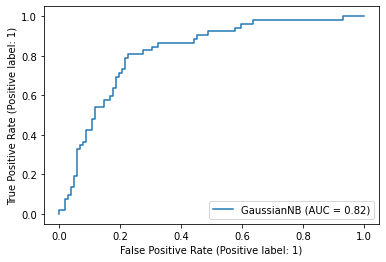

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,20,18,84,32,0.807692,0.64,0.36,0.192308,0.807692,0.823529,0.815534,0.246753,0.753247,0.723846,0.447692,0.443091


iteration : 2


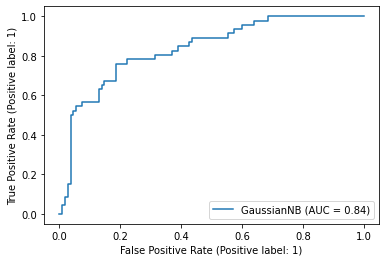

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,21,8,100,25,0.826446,0.757576,0.242424,0.173554,0.826446,0.925926,0.873362,0.188312,0.811688,0.792011,0.584022,0.510843


iteration : 3


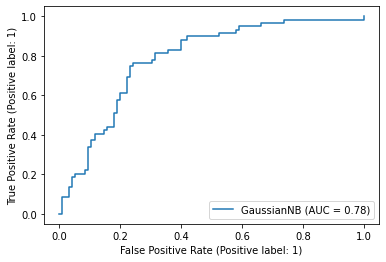

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,25,19,76,34,0.752475,0.641509,0.358491,0.247525,0.752475,0.8,0.77551,0.285714,0.714286,0.696992,0.393985,0.383664


iteration : 4


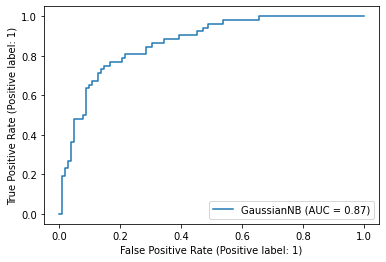

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,14,15,87,38,0.861386,0.716981,0.283019,0.138614,0.861386,0.852941,0.857143,0.188312,0.811688,0.789184,0.578367,0.580972


iteration : 5


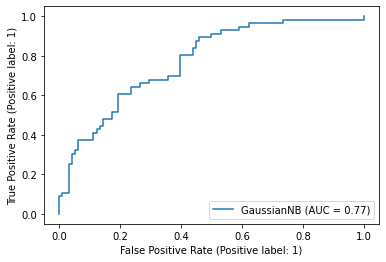

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,31,13,85,25,0.732759,0.657895,0.342105,0.267241,0.732759,0.867347,0.794393,0.285714,0.714286,0.695327,0.390653,0.336986


iteration : 6


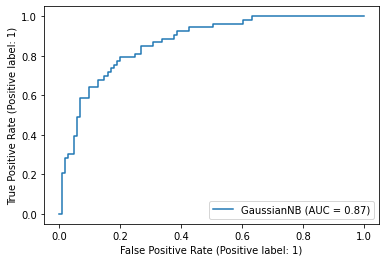

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,18,13,88,35,0.830189,0.729167,0.270833,0.169811,0.830189,0.871287,0.850242,0.201299,0.798701,0.779678,0.559355,0.543856


iteration : 7


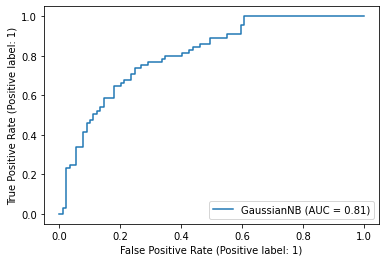

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,28,13,76,37,0.730769,0.74,0.26,0.269231,0.730769,0.853933,0.787565,0.266234,0.733766,0.735385,0.470769,0.436753


iteration : 8


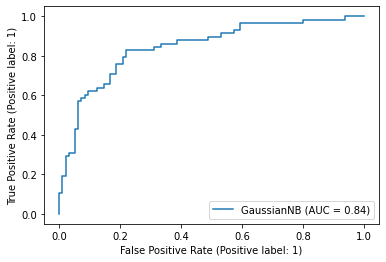

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,20,14,82,38,0.803922,0.730769,0.269231,0.196078,0.803922,0.854167,0.828283,0.220779,0.779221,0.767345,0.534691,0.519985


iteration : 9


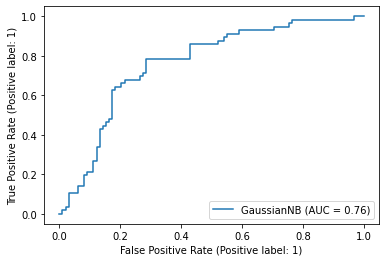

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,29,17,81,27,0.736364,0.613636,0.386364,0.263636,0.736364,0.826531,0.778846,0.298701,0.701299,0.675,0.35,0.323529


iteration : 10


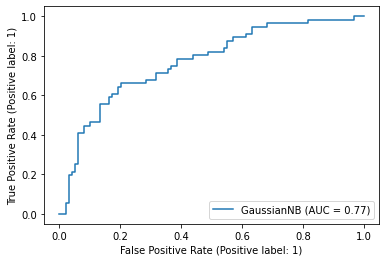

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,23,17,81,33,0.778846,0.66,0.34,0.221154,0.778846,0.826531,0.80198,0.25974,0.74026,0.719423,0.438846,0.425587


 Mean Accuracy of Naive Bayes : 75.5844155844156


In [128]:
from sklearn.naive_bayes import GaussianNB
total_score = 0.0
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
    model1 = GaussianNB()
    model1.fit(X_train,y_train)
    prediction_value=model1.predict(X_test)
    confusion_matrix_naive=confusion_matrix(y_test, prediction_value)
    print("iteration :", i)
    metrics.plot_roc_curve(model1, X_test, y_test)
    plt.show()
    plt.show()
    final_value=calculate(confusion_matrix_naive)
    display(final_value)
    total_score = total_score + accuracy_score(prediction_value,y_test)
print(" Mean Accuracy of Naive Bayes :", (total_score/10)*100)

# Implementing LSTM :

20/20 [==============================] - 5s 13ms/step - loss: 10.2076 - accuracy: 0.3306
iteration 1


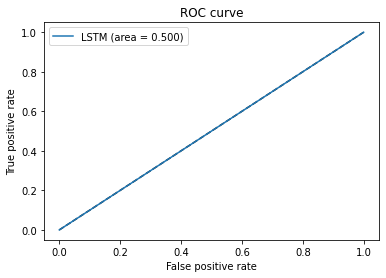

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,0,89,0,65,NaN,0.422078,0.577922,NaN,NaN,0.0,0.0,0.577922,0.422078,NaN,NaN,0.0


20/20 [==============================] - 4s 13ms/step - loss: 10.2324 - accuracy: 0.3290
iteration 2


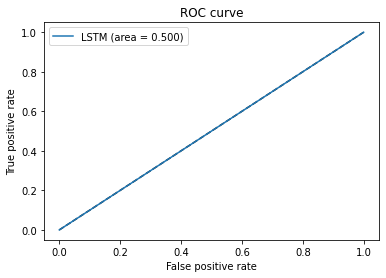

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,0,88,0,66,NaN,0.428571,0.571429,NaN,NaN,0.0,0.0,0.571429,0.428571,NaN,NaN,0.0


20/20 [==============================] - 5s 13ms/step - loss: 10.0337 - accuracy: 0.3420
iteration 3


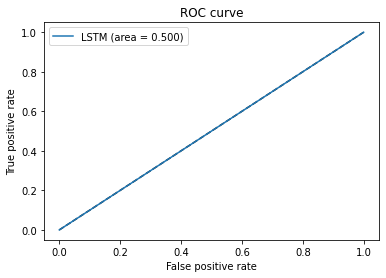

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,0,96,0,58,NaN,0.376623,0.623377,NaN,NaN,0.0,0.0,0.623377,0.376623,NaN,NaN,0.0


20/20 [==============================] - 4s 13ms/step - loss: 10.2076 - accuracy: 0.3306
iteration 4


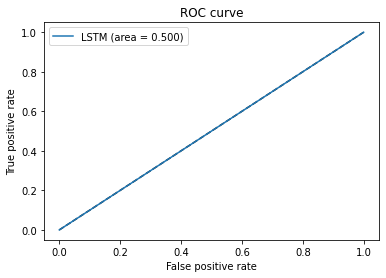

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,0,89,0,65,NaN,0.422078,0.577922,NaN,NaN,0.0,0.0,0.577922,0.422078,NaN,NaN,0.0


20/20 [==============================] - 4s 13ms/step - loss: 9.9095 - accuracy: 0.3502
iteration 5


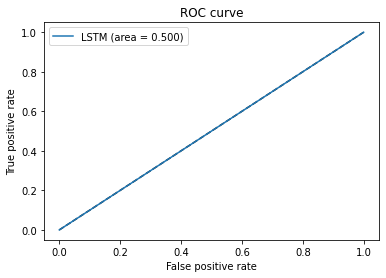

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,0,101,0,53,NaN,0.344156,0.655844,NaN,NaN,0.0,0.0,0.655844,0.344156,NaN,NaN,0.0


20/20 [==============================] - 4s 12ms/step - loss: 10.0585 - accuracy: 0.3404
iteration 6


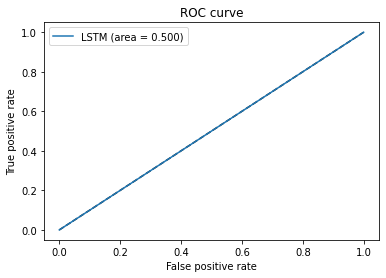

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,0,95,0,59,NaN,0.383117,0.616883,NaN,NaN,0.0,0.0,0.616883,0.383117,NaN,NaN,0.0


20/20 [==============================] - 4s 12ms/step - loss: 9.9095 - accuracy: 0.3502
iteration 7


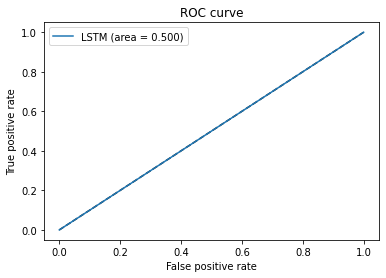

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,0,101,0,53,NaN,0.344156,0.655844,NaN,NaN,0.0,0.0,0.655844,0.344156,NaN,NaN,0.0


20/20 [==============================] - 5s 13ms/step - loss: 9.8598 - accuracy: 0.3534
iteration 8


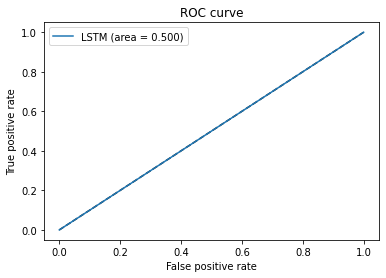

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,0,103,0,51,NaN,0.331169,0.668831,NaN,NaN,0.0,0.0,0.668831,0.331169,NaN,NaN,0.0


20/20 [==============================] - 4s 13ms/step - loss: 9.8350 - accuracy: 0.3550
iteration 9


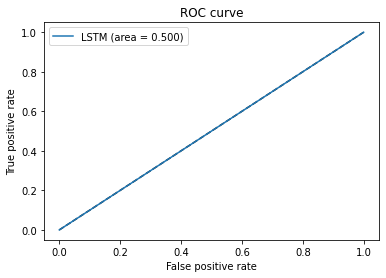

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,0,104,0,50,NaN,0.324675,0.675325,NaN,NaN,0.0,0.0,0.675325,0.324675,NaN,NaN,0.0


20/20 [==============================] - 5s 13ms/step - loss: 9.9095 - accuracy: 0.3502
iteration 10


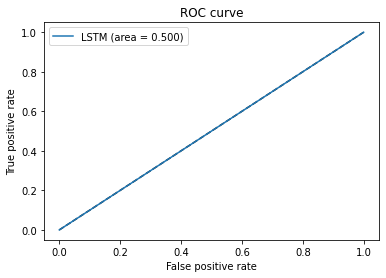

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,0,101,0,53,NaN,0.344156,0.655844,NaN,NaN,0.0,0.0,0.655844,0.344156,NaN,NaN,0.0


Mean Accuracy of LSTM on data: 
5/5 [==============================] - 1s 5ms/step - loss: 10.0011 - accuracy: 0.3442


[10.001123428344727, 0.34415584802627563]

In [129]:
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
    model2 = Sequential()
    model2.add(LSTM(units = 64, return_sequences = True,input_shape= (X_train.shape[1],1)))
    model2.add(LSTM(units = 64, return_sequences = True))
    model2.add(Dense(units = 1,activation='softmax'))
    model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
    model2.fit(X_train,y_train)
    prediction_rm=model2.predict(X_test)
    prediction_value=prediction_rm[:,0]
    print("iteration",i)
    y_pred_keras = prediction_value.ravel()
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='LSTM (area = {:.3f})'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    n_lstm=tf.math.confusion_matrix(y_test,prediction_value)
    confusion_matrix_lstm=n_lstm.numpy()
    final_value=calculate(confusion_matrix_lstm)
    display(final_value)
print("Mean Accuracy of LSTM on data: ")
model2.evaluate(X_test,y_test)


# Implementing Random Forest :

iteration : 1


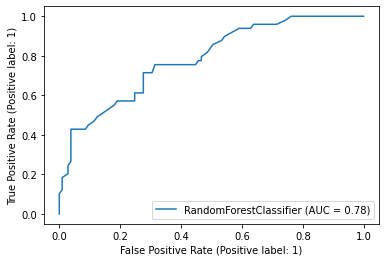

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,22,19,86,27,0.796296,0.586957,0.413043,0.203704,0.796296,0.819048,0.807512,0.266234,0.733766,0.691626,0.383253,0.37621


iteration : 2


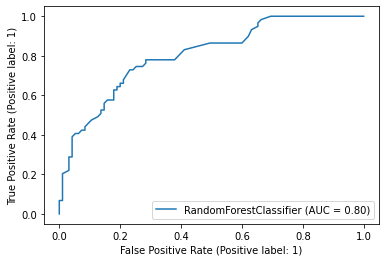

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,25,15,80,34,0.761905,0.693878,0.306122,0.238095,0.761905,0.842105,0.8,0.25974,0.74026,0.727891,0.455782,0.432258


iteration : 3


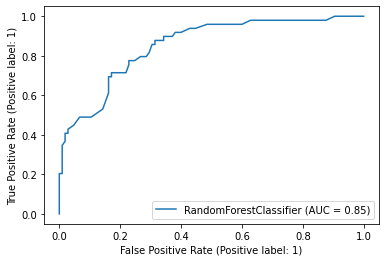

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,15,18,87,34,0.852941,0.653846,0.346154,0.147059,0.852941,0.828571,0.84058,0.214286,0.785714,0.753394,0.506787,0.514056


iteration : 4


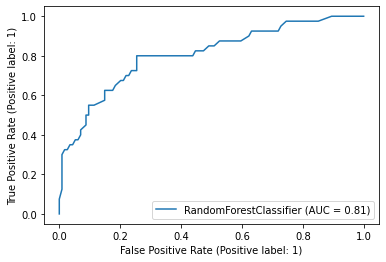

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,15,19,95,25,0.863636,0.568182,0.431818,0.136364,0.863636,0.833333,0.848214,0.220779,0.779221,0.715909,0.431818,0.443925


iteration : 5


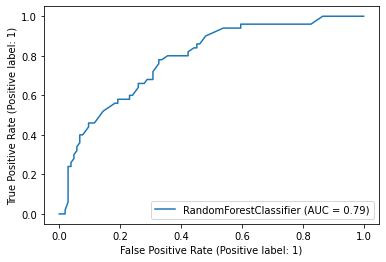

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,22,19,85,28,0.794393,0.595745,0.404255,0.205607,0.794393,0.817308,0.805687,0.266234,0.733766,0.695069,0.390137,0.383278


iteration : 6


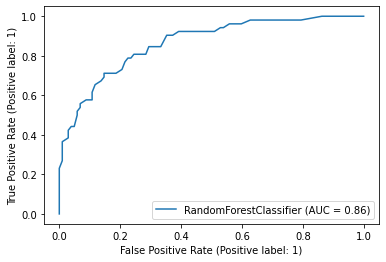

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,16,15,87,36,0.84466,0.705882,0.294118,0.15534,0.84466,0.852941,0.84878,0.201299,0.798701,0.775271,0.550543,0.547831


iteration : 7


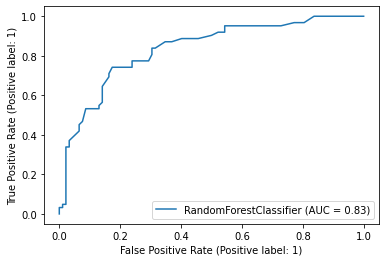

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,28,12,80,34,0.740741,0.73913,0.26087,0.259259,0.740741,0.869565,0.8,0.25974,0.74026,0.739936,0.479871,0.43631


iteration : 8


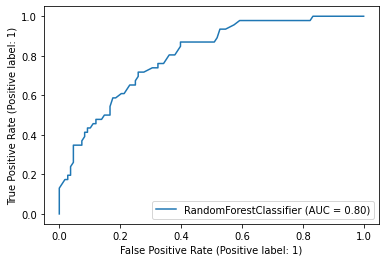

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,25,13,95,21,0.791667,0.617647,0.382353,0.208333,0.791667,0.87963,0.833333,0.246753,0.753247,0.704657,0.409314,0.363359


iteration : 9


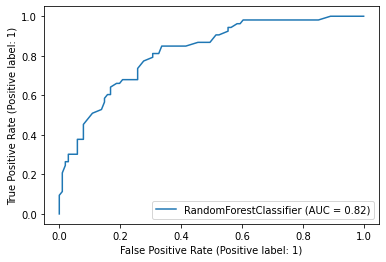

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,17,21,80,36,0.824742,0.631579,0.368421,0.175258,0.824742,0.792079,0.808081,0.246753,0.753247,0.728161,0.456321,0.463021


iteration : 10


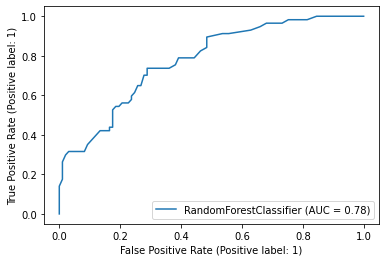

,False negative,False positive,True positive,True negative,True positive rate,True negative rate,False positive rate,False negative rate,Recall,Precision,F1 measure,Error rate,Accuracy,Balanced Accuracy,True Skill Statistics,Heidke Skill Score
0,29,17,80,28,0.733945,0.622222,0.377778,0.266055,0.733945,0.824742,0.776699,0.298701,0.701299,0.678084,0.356167,0.330308


Mean Accuracy of Random Forest on data:  75.1948051948052


In [115]:
from sklearn.ensemble import RandomForestClassifier
total_score = 0.0
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
    model3 = RandomForestClassifier()
    model3.fit(X_train,y_train)
    prediction_rm=model3.predict(X_test)
    print("iteration :", i)
    metrics.plot_roc_curve(model3, X_test, y_test)
    plt.show()
    confusion_matrix_Random=confusion_matrix(y_test, prediction_rm)
    final_value=calculate(confusion_matrix_Random)
    display(final_value)
    total_score = total_score + accuracy_score(prediction_rm,y_test)
print("Mean Accuracy of Random Forest on data: " , (total_score/10)*100)